## Census data from UCI to classify income ##

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Importing Datasets ##

In [2]:
data_train = pd.read_csv("C:/Users/ron23/Downloads/Income_prediction-main/adult.csv")
data_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Data Cleansing ##

In [3]:
data_train.shape

(32561, 15)

As we can see that the entire data comprises of 32561 rows from training set and 16282 from testing set. Moving forward we will
only develop models on training and evaluate them on testing sets. 

In [4]:
# Features data-type
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Statistical summary
data_train.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Check for null values
(data_train.isnull().sum() / data_train.shape[0])

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education.num     0.0
marital.status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital.gain      0.0
capital.loss      0.0
hours.per.week    0.0
native.country    0.0
income            0.0
dtype: float64

Just a visual check on the dataset reveals an error of '?' character in various columns which needs to be fixed later. Lets identify those columns.

In [7]:
data_train.isin(['?']).sum() / data_train.shape[0]

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    0.017905
income            0.000000
dtype: float64

In [8]:
# Checking the counts of label categories
data_train['income'].value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

#### Key Observations: ####

* The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.


* The dataset is unbalanced, as the dependent feature 'income' contains 75.91% values have income less than 50k and 24.08% values have income more than 50k.

## EDA ##

Here I am checking the distribution of several features in the dataset.

#### Univariate Analysis

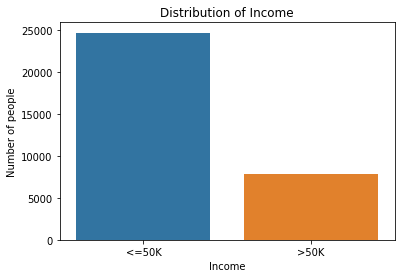

In [9]:
# Creating a barplot for 'Income'
income = data_train['income'].value_counts()
sns.barplot(income.index, income.values)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Number of people')
plt.show()

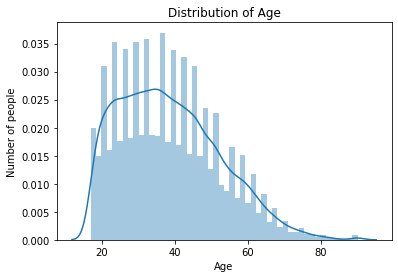

In [10]:
# Creating a distribution plot for 'Age'
age = data_train['age'].value_counts()
sns.distplot(data_train['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

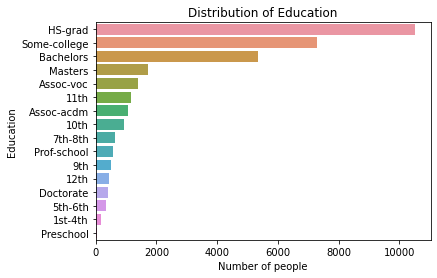

In [11]:
# Creating a barplot for 'Education'
education = data_train['education'].value_counts()
sns.barplot(education.values, education.index)
plt.title('Distribution of Education')
plt.xlabel('Number of people')
plt.ylabel('Education')
plt.show()

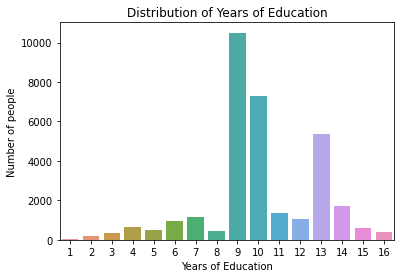

In [12]:
# Creating a barplot for 'Years of Education'
education_num = data_train['education.num'].value_counts()
sns.barplot(education_num.index, education_num.values)
plt.title('Distribution of Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.show()

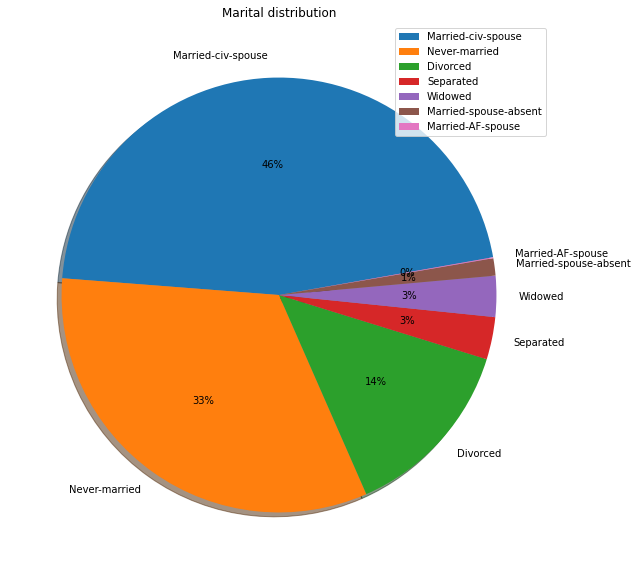

In [13]:
# Creating a pie chart for 'Marital status'
status = data_train['marital.status'].value_counts()
plt.figure(figsize=(15, 10))
plt.pie(status.values, labels=status.index, startangle=10, shadow=True, autopct='%1.0f%%')
plt.title('Marital distribution')
plt.legend()
plt.show()

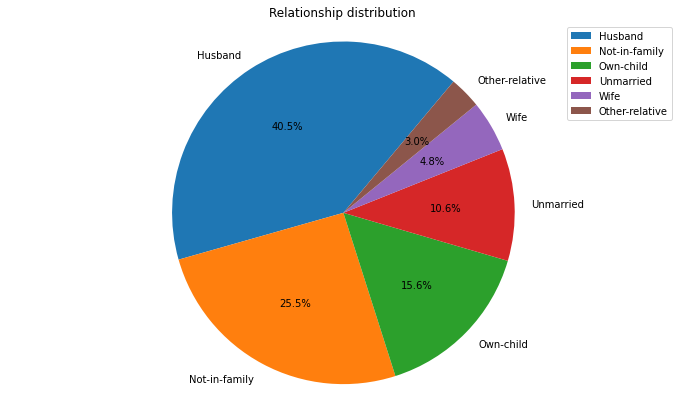

In [14]:
# Creating a pie chart for 'Age'
relation = data_train['relationship'].value_counts()
plt.figure(figsize=(12, 7))
plt.pie(relation.values, labels=relation.index, startangle=50, autopct='%1.1f%%')
plt.title('Relationship distribution')
plt.axis('equal')
plt.legend()
plt.show()

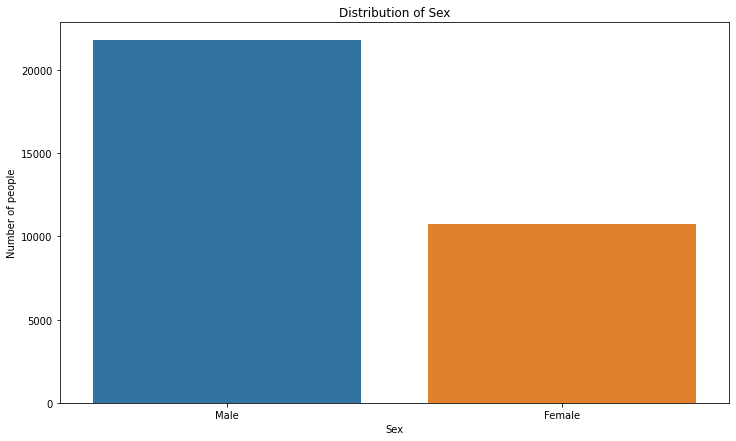

In [15]:
# Creating a barplot for 'Sex'
sex = data_train['sex'].value_counts()
plt.figure(figsize=(12, 7))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

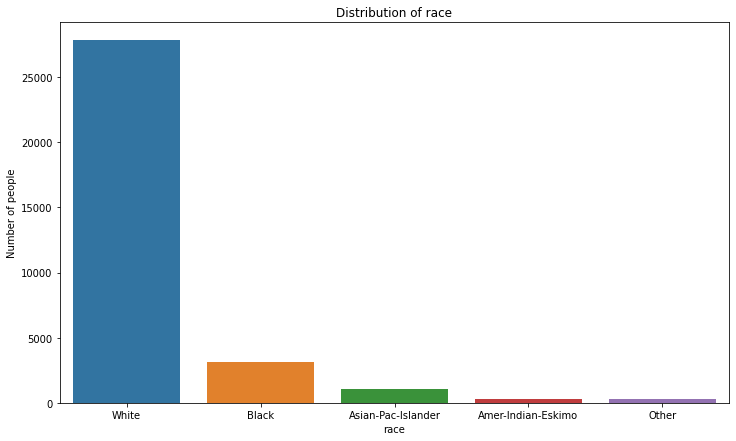

In [16]:
# Creating a barplot for 'Race'
race  = data_train['race'].value_counts()
plt.figure(figsize=(12, 7))
sns.barplot(race.index, race.values)
plt.title('Distribution of race')
plt.xlabel('race')
plt.ylabel('Number of people')
plt.show()

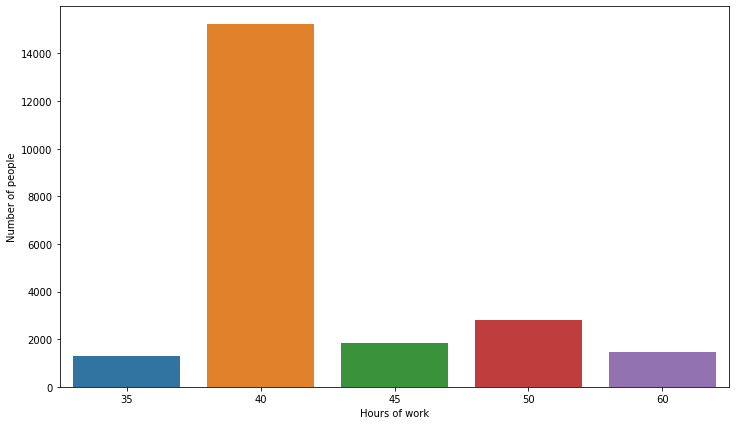

In [17]:
# Creating a barplot for 'Hours per week'
hours = data_train['hours.per.week'].value_counts().head(5)
plt.figure(figsize=(12, 7))
sns.barplot(hours.index, hours.values)
plt.xlabel('Hours of work')
plt.ylabel('Number of people')

plt.show()

#### Bivariate Analysis

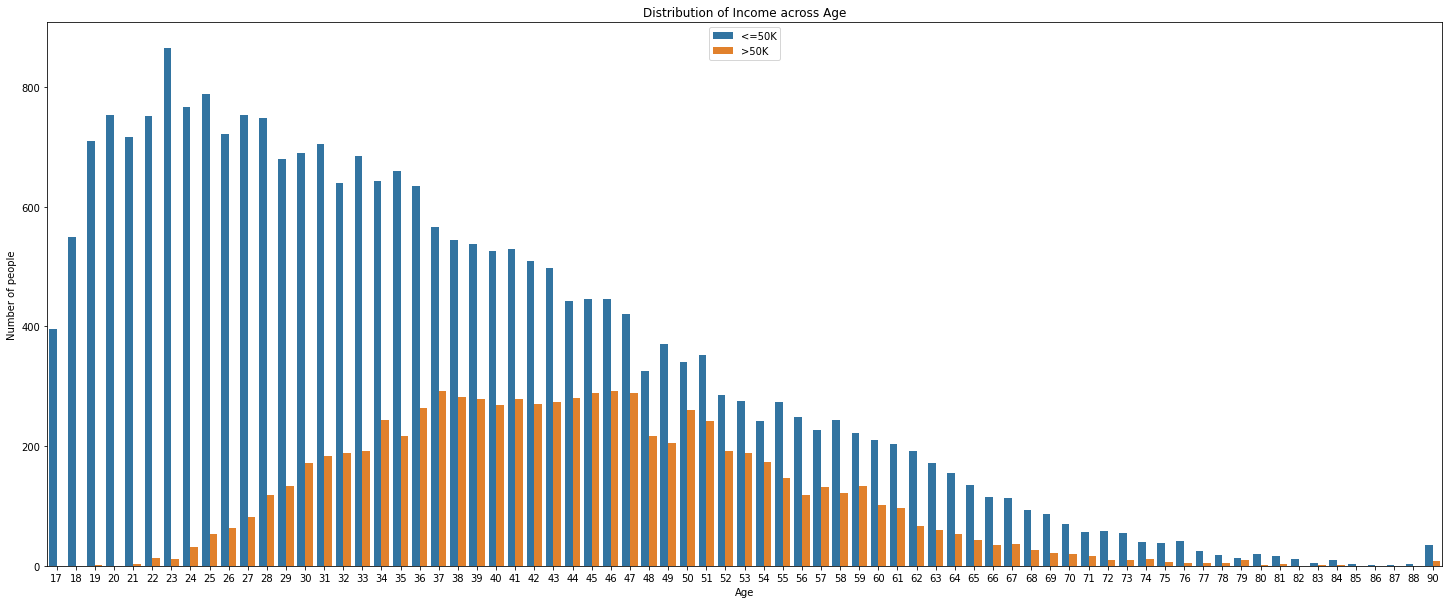

In [18]:
# Creating a countplot of income across age
plt.figure(figsize=(25, 10))
sns.countplot(data_train['age'], hue=data_train['income'])
plt.title('Distribution of Income across Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.legend()
plt.show()

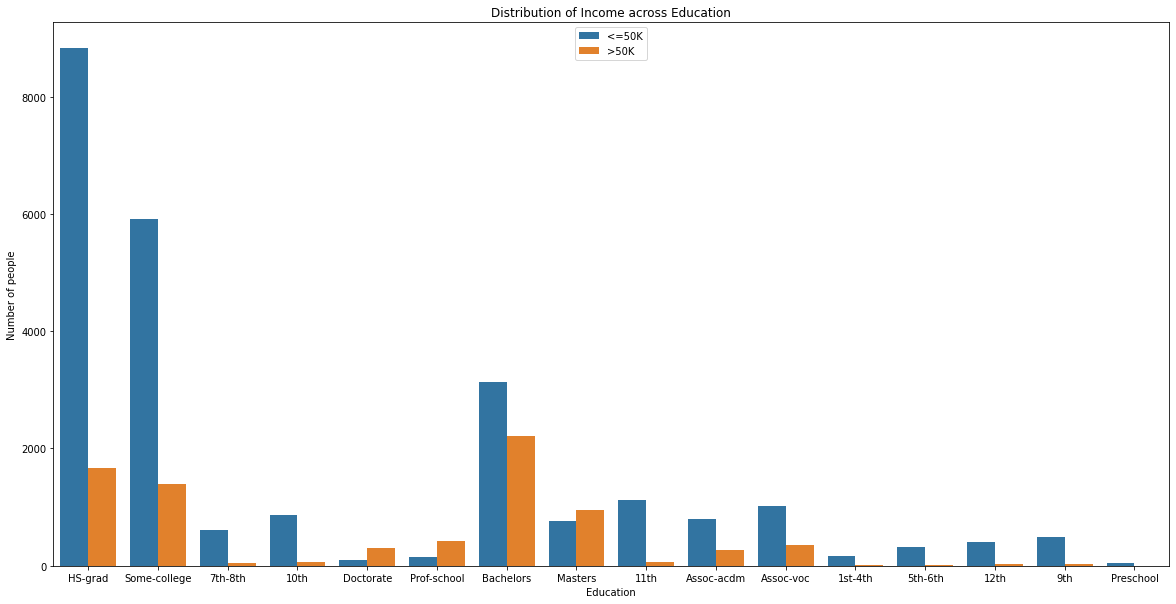

In [19]:
# Creating a countplot of income across education

plt.figure(figsize=(20, 10))
sns.countplot(data_train['education'], hue=data_train['income'])
plt.title('Distribution of Income across Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.legend()
plt.show()

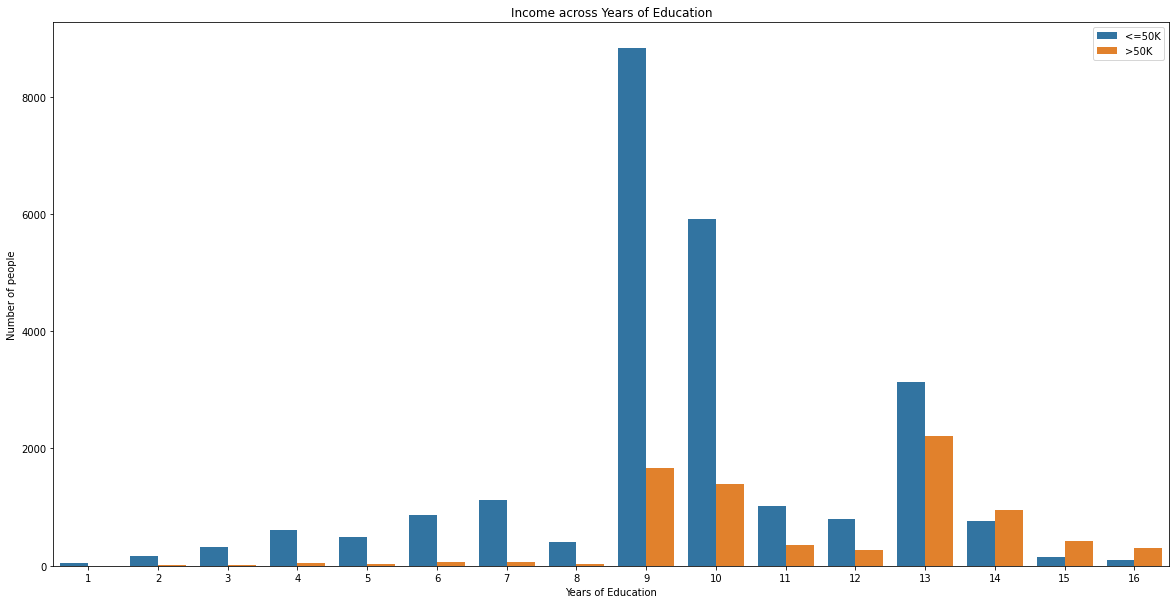

In [20]:
# Creating a countplot of income across years of education

plt.figure(figsize=(20, 10))
sns.countplot(data_train['education.num'], hue=data_train['income'])
plt.title('Income across Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.legend()
plt.show()

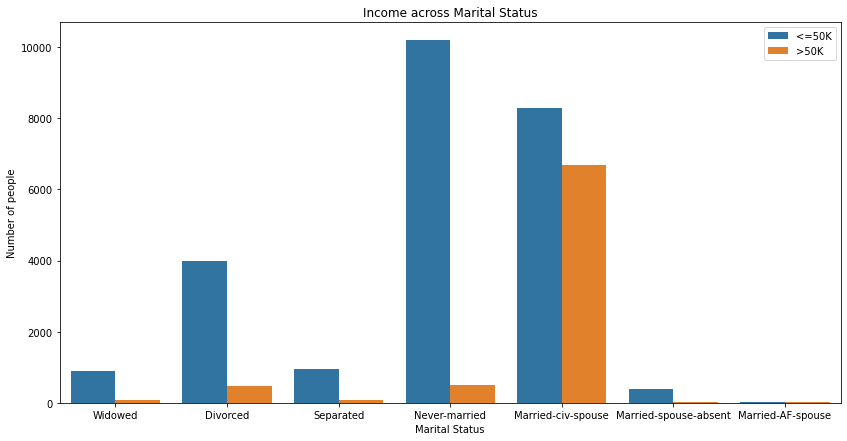

In [21]:
# Creating a countplot of income across Marital Status
plt.figure(figsize=(14, 7))
sns.countplot(data_train['marital.status'], hue=data_train['income'])
plt.title('Income across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.legend()
plt.show()

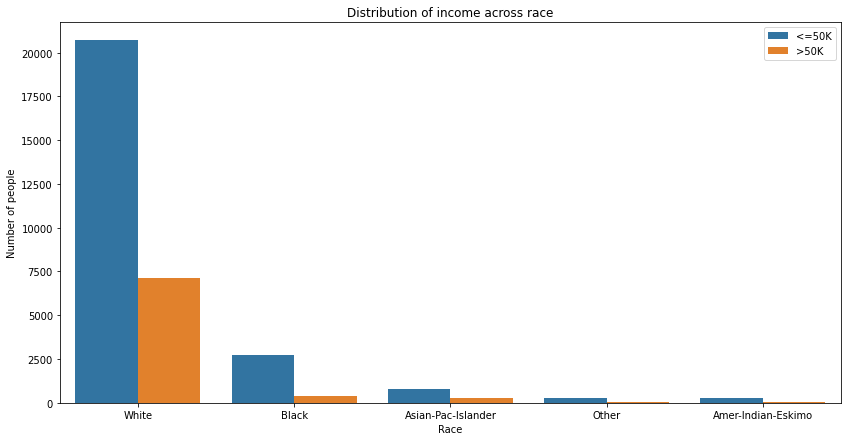

In [22]:
# Creating a countplot of income across race
plt.figure(figsize=(14, 7))
sns.countplot(data_train['race'], hue=data_train['income'])
plt.title('Distribution of income across race')
plt.xlabel('Race')
plt.ylabel('Number of people')
plt.legend()
plt.show()

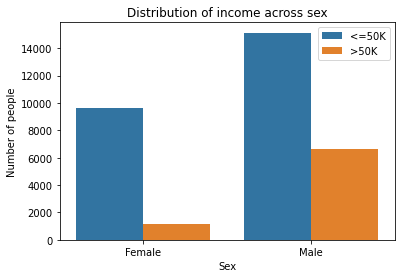

In [23]:
# Creating a countplot of income across sex
sns.countplot(data_train['sex'], hue=data_train['income'])
plt.title('Distribution of income across sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.legend()
plt.show()

#### Multivariate analysis

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
data_train['income'] = le.fit_transform(data_train['income'])

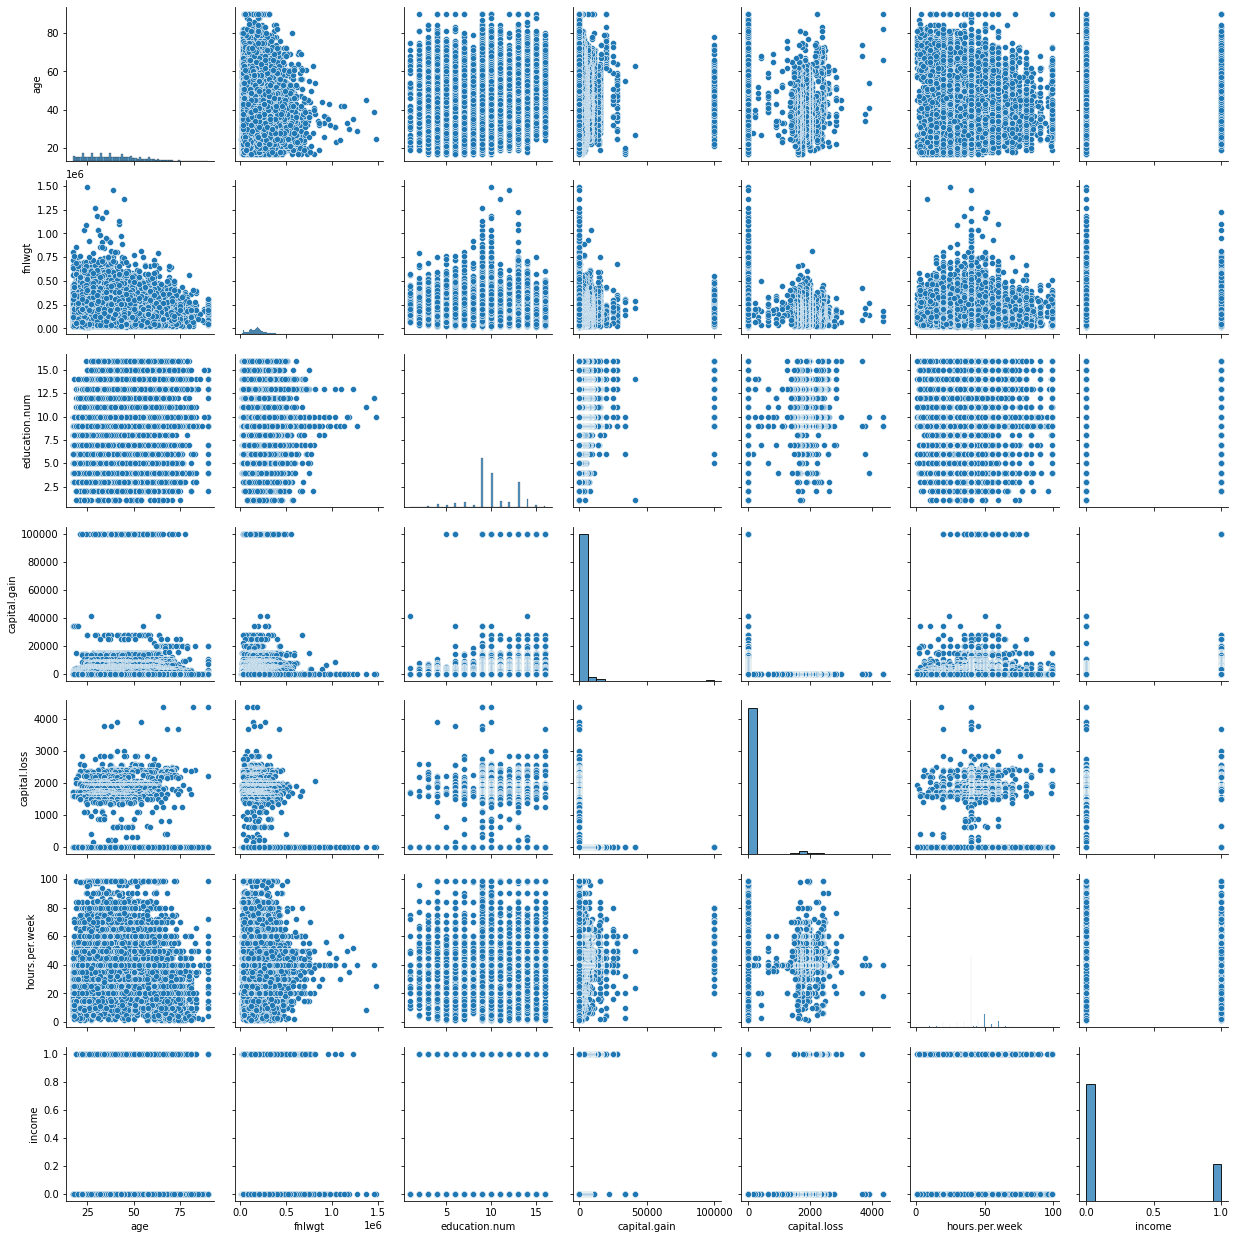

In [26]:
# Creating a pairplot of dataset
sns.pairplot(data_train)
plt.show()

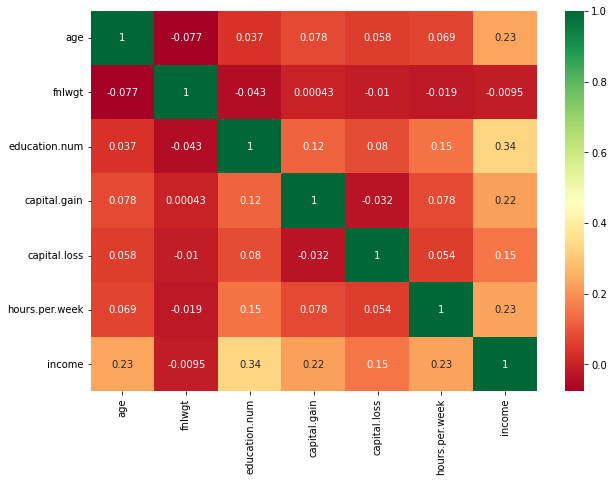

In [27]:
corr = data_train.corr()
plt.figure(figsize=(10, 7))
ax = sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

##### Description of fnlwgt (final weight)

The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls.
These are:



*   A single cell estimate of the population 16+ for each state.
*  Controls for Hispanic Origin by age and sex.
*  Controls by Race, age and sex.


We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.
The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.

People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement.  That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

#### Key Observations: ####

* In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.

* From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

## Feature engineering ##

In [28]:
# Fixing the '?' problem in 'workclass' , 'occupation'  and 'native_country' 
data_train = data_train.replace('?', np.nan)

In [29]:
# Check for null values
(data_train.isnull().sum() / data_train.shape[0])

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    0.017905
income            0.000000
dtype: float64

In [30]:
# Working with missing data.
# I decided to use the mode to replace these missing data

nancolumns = ['workclass', 'occupation', 'native.country']

In [31]:
for col in nancolumns:
    data_train[col].fillna(data_train[col].mode()[0], inplace=True)

## Data Preprocessing ##

#### Encoding categorical variables ####

In [32]:
from sklearn.preprocessing import LabelEncoder
for i in data_train.columns:
    if data_train[i].dtypes == 'object':
        encoder = LabelEncoder()
        data_train[i] = encoder.fit_transform(data_train[i])

In [33]:
X = data_train.drop('income', axis=1)
Y = data_train['income']

#### Feature selection ####

In [34]:
# Using extratreesclassifier to identify the relavant features
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)
selector.fit(X, Y)
feature_imp = selector.feature_importances_

In [35]:
for index, val in enumerate(feature_imp):
    print(index,val)

0 0.1558772956288898
1 0.041277806375525194
2 0.16710920314933972
3 0.03873650134283664
4 0.0865566081861885
5 0.08039848529711714
6 0.07269499409818259
7 0.0861966512276747
8 0.014713936466208522
9 0.028432408903760874
10 0.08825217347461806
11 0.028108135824546288
12 0.09637426044623668
13 0.015271539578875292


Considering 0.05 as the thresold  will drop all features below it.

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [37]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country', 'relationship', 'capital.gain'], axis=1)

#### Feature Scaling ####

In [38]:
from sklearn.preprocessing import StandardScaler
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

#### Fixing Imbalanced data ####

Here I have used smotettomek to rebalance the dataset.

In [39]:
Y.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: income, dtype: float64

In [40]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)

In [41]:
X_res, Y_res = smt.fit_resample(X, Y)

In [42]:
Y_res.value_counts(normalize=True)

1    0.5
0    0.5
Name: income, dtype: float64

#### Train-test split ####


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_res, Y_res, test_size=0.2, random_state=42)

In [44]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((38129, 6), (9533, 6), (38129,), (9533,))

In [45]:
X_train.columns

Index(['age', 'fnlwgt', 'education.num', 'marital.status', 'occupation',
       'hours.per.week'],
      dtype='object')

## Model Creation ##

#### Logistic regression ####

In [46]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=42)

In [47]:
log_classifier.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [48]:
Y_pred_log_reg = log_classifier.predict(X_test)

#### KNN Classifier ####

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [50]:
Y_pred_knn = knn.predict(X_test)

#### SVM ####

In [51]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [52]:
Y_pred_svc = svc.predict(X_test)

#### Decision Tree Classifier ####

In [53]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
Y_pred_dec_tree = dec_tree.predict(X_test)

#### Random Forest Classifier ####

In [55]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [56]:
Y_pred_ran_for = ran_for.predict(X_test)

#### XGBoost Classifier ####

In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

[17:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
Y_pred_xgb = xgb.predict(X_test)

#### ANN ####

In [59]:
import tensorflow as tf

In [60]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
ann.fit(X_train, Y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1192/1192 [==============================] - 4s 1ms/step - loss: 0.5084 - accuracy: 0.7522
Epoch 2/100
1192/1192 [==============================] - 1s 1ms/step - loss: 0.4221 - accuracy: 0.8093
Epoch 3/100
1192/1192 [==============================] - 2s 1ms/step - loss: 0.4159 - accuracy: 0.8116
Epoch 4/100
1192/1192 [==============================] - 1s 1ms/step - loss: 0.4131 - accuracy: 0.8119
Epoch 5/100
1192/1192 [==============================] - 2s 1ms/step - loss: 0.4114 - accuracy: 0.8126
Epoch 6/100
1192/1192 [==============================] - 1s 1ms/step - loss: 0.4104 - accuracy: 0.8131
Epoch 7/100
1192/1192 [==============================] - 1s 1ms/step - loss: 0.4093 - accuracy: 0.8136
Epoch 8/100
1192/1192 [==============================] - 2s 1ms/step - loss: 0.4084 - accuracy: 0.8145
Epoch 9/100
1192/1192 [==============================] - 1s 1ms/step - loss: 0.4081 - accuracy: 0.8148
Epoch 10/100
1192/1192 [==============================] - 1s 1ms/step - l

1192/1192 [==============================] - 2s 1ms/step - loss: 0.4020 - accuracy: 0.8166
Epoch 80/100
1192/1192 [==============================] - 2s 2ms/step - loss: 0.4021 - accuracy: 0.8172
Epoch 81/100
1192/1192 [==============================] - 2s 2ms/step - loss: 0.4015 - accuracy: 0.8169: 0s - loss: 0.4034 - ac - ETA: 0s - loss: 0
Epoch 82/100
1192/1192 [==============================] - 2s 1ms/step - loss: 0.4019 - accuracy: 0.8174
Epoch 83/100
1192/1192 [==============================] - 2s 1ms/step - loss: 0.4019 - accuracy: 0.8165
Epoch 84/100
1192/1192 [==============================] - 1s 1ms/step - loss: 0.4016 - accuracy: 0.8171
Epoch 85/100
1192/1192 [==============================] - 2s 1ms/step - loss: 0.4018 - accuracy: 0.8166
Epoch 86/100
1192/1192 [==============================] - 2s 1ms/step - loss: 0.4017 - accuracy: 0.8165
Epoch 87/100
1192/1192 [==============================] - 2s 1ms/step - loss: 0.4022 - accuracy: 0.8172
Epoch 88/100
1192/1192 [=========

In [61]:
Y_pred_ann = ann.predict(X_test)

## Model Evaluation ##

In [62]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import f1_score

In [63]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))
print('ROC AUC score:', round(roc_auc_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 72.68
F1 score: 73.14
ROC AUC score: 72.69


In [64]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))
print('ROC AUC score:', round(roc_auc_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 84.98
F1 score: 86.02
ROC AUC score: 85.0


In [65]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))
print('ROC AUC score:', round(roc_auc_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.81
F1 score: 82.83
ROC AUC score: 81.82


In [66]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('ROC AUC score:', round(roc_auc_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 85.35
F1 score: 85.48
ROC AUC score: 85.35


In [67]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))
print('ROC AUC score:', round(roc_auc_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 89.76
F1 score: 89.95
ROC AUC score: 89.77


In [68]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2))
print('ROC AUC score:', round(roc_auc_score(Y_test, Y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 89.22
F1 score: 89.32
ROC AUC score: 89.22


## Hyperparameter Tuning ##

#### Random Forest :

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [71]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [72]:
rf_tuned = RandomForestClassifier(random_state=42)

In [73]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [74]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [75]:
rf_cv.best_score_

0.8916048376348386

In [76]:
rf_cv.best_params_

{'n_estimators': 110, 'max_depth': 40}

In [77]:
rf_final = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [78]:
rf_final.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [79]:
Y_pred_rf_final = rf_final.predict(X_test)

In [80]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_final) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_final) * 100, 2))
print('ROC AUC score:', round(roc_auc_score(Y_test, Y_pred_rf_final) * 100, 2))

Random Forest Classifier:
Accuracy score: 89.6
F1 score: 89.74
ROC AUC score: 89.61


In [81]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_final))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4777
           1       0.88      0.91      0.90      4756

    accuracy                           0.90      9533
   macro avg       0.90      0.90      0.90      9533
weighted avg       0.90      0.90      0.90      9533



#### XGBoost:

In [82]:
XGBclassifier=XGBClassifier()

In [83]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [84]:
random_search=RandomizedSearchCV(XGBclassifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=2)

In [85]:
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[17:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [86]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [87]:
XGpred = random_search.predict(X_test)

In [88]:
print('XGBoost Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, XGpred) * 100, 2))
print('F1 score:', round(f1_score(Y_test, XGpred) * 100, 2))
print('ROC AUC score:', round(roc_auc_score(Y_test, XGpred) * 100, 2))

XGBoost Classifier:
Accuracy score: 89.22
F1 score: 89.28
ROC AUC score: 89.22


In [89]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, XGpred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4777
           1       0.89      0.90      0.89      4756

    accuracy                           0.89      9533
   macro avg       0.89      0.89      0.89      9533
weighted avg       0.89      0.89      0.89      9533



#### ANN:

In [90]:
from tensorflow import keras
from keras_tuner.tuners import RandomSearch
from tensorflow.keras import layers

In [91]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [92]:
tuner = RandomSearch(build_model, objective='val_loss', max_trials=3, executions_per_trial=3)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [93]:
tuner.search(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))

INFO:tensorflow:Oracle triggered exit


#### Ensemble Model

In [94]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('rf', rf_final), ('xgb', random_search)], voting='hard')
model.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[17:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=102,
                                                     n_estimators=40,
                                                     random_state=42)),
                             ('xgb',
                              RandomizedSearchCV(cv=5,
                                                 estimator=XGBClassifier(base_score=None,
                                                                         booster=None,
                                                                         colsample_bylevel=None,
                                                                         colsample_bynode=None,
                                                                         colsample_bytree=None,
                                                                         enable_categorical=False,
                                                                         gamma=None,
            

In [95]:
predictions = model.predict(X_test)

In [96]:
print('Ensemble Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, predictions) * 100, 2))
print('F1 score:', round(f1_score(Y_test, predictions) * 100, 2))
print('ROC AUC score:', round(roc_auc_score(Y_test, predictions) * 100, 2))

Ensemble Classifier:
Accuracy score: 89.32
F1 score: 89.04
ROC AUC score: 89.32


In [97]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4777
           1       0.91      0.87      0.89      4756

    accuracy                           0.89      9533
   macro avg       0.89      0.89      0.89      9533
weighted avg       0.89      0.89      0.89      9533



#### Saving the model

In [98]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf_final, open(filename, 'wb'))

## Conclusion ##


* In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.

* A hyperparameter tuned random forest classifier gives the highest accuracy score of 90.58 and f1 score of 90.72 and ROC_AC score of 90.57.
